In [84]:

import datetime

import copy

import random


from dateutil.relativedelta import relativedelta



In [85]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
# plt.style.use('seaborn')
# plt.style.use(['dark_background', 'ggplot'])

import seaborn as sns
# sns.set()

# import scipy
# import scipy.stats as stats


# # sympy = symbolic math in Python
# import sympy as sym
# import sympy.plotting.plot as symplot


# make the equations look nicer

# from IPython.display import display
# display.set_matplotlib_formats('svg') # Deprecated since version 7.23

# import matplotlib_inline
# matplotlib_inline.backend_inline.set_matplotlib_formats('svg')


%config InlineBackend.set_matplotlib_formats = ["svg"]
%config InlineBackend.figure_formats = ["svg"]




In [86]:

import sklearn


from sklearn.model_selection import train_test_split


# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler     # <------------ (-1.0, 1.0)
# from sklearn.preprocessing import MinMaxScaler


from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error


from imblearn.over_sampling import SMOTE




In [87]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import TensorDataset, DataLoader





torch.__version__

'1.12.0+cu113'

In [88]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

In [89]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [90]:
def print_score(shape, yHat, y, yHat_test, yy):
    
    
    n, p = shape
    
    R2 = r2_score(y.detach().numpy(), yHat.detach().numpy())
    
    Adj_r2 = 1 - (1 - R2)  *  (n - 1) / (n - p - 1)
    
    print(f'Adjusted R-Squared(y, yHat): {Adj_r2:0.4f}\n\n')
    # r2_score(yy.detach().numpy(), yHat_test.detach().numpy())
    #  R^2 score is not well-defined with less than two samples
    
    
    print(f'mean_absolute_error(y, yHat):',
          f'{mean_absolute_error(y.detach().numpy(), yHat.detach().numpy()):0.4f}\n')
    print(f'mean_absolute_error(yy, yHat_test):',
          f'{mean_absolute_error(yy.detach().numpy(), yHat_test.detach().numpy()):0.4f}\n\n')
    
    
    print(f'mean_squared_error(y, yHat):',
          f'{mean_squared_error(y.detach().numpy(), yHat.detach().numpy()):0.4f}\n')
    print(f'mean_squared_error(yy, yHat_test):',
          f'{mean_squared_error(yy.detach().numpy(), yHat_test.detach().numpy()):0.4f}\n\n')
    
    
    print(f'mean_squared_log_error(y, yHat):',
          f'{mean_squared_log_error(y.detach().numpy(), yHat.detach().numpy()):0.4f}\n')
    print(f'mean_squared_log_error(yy, yHat_test):',
          f'{mean_squared_log_error(yy.detach().numpy(), yHat_test.detach().numpy()):0.4f}\n\n')
    
    
    
    print(f'RMSE(y, yHat):',
          f'{np.sqrt( mean_squared_error(y.detach().numpy(), yHat.detach().numpy()) ):0.4f}\n')
    print(f'RMSE(yy, yHat_test):',
          f'{np.sqrt( mean_squared_error(yy.detach().numpy(), yHat_test.detach().numpy()) ):0.4f}\n\n')
    
    
    
    
    

In [91]:
# date = np.datetime64("2000-01-01")
# date_strings = date.astype(str).split('-'). 
# # >> ['2000', '01', '01']

# year_int = int(date_strings[0])

In [92]:
!wget -nc https://raw.githubusercontent.com/Proteinea/dl-challenge-2/main/data/data.txt
!wget -nc https://raw.githubusercontent.com/Proteinea/dl-challenge-2/main/data/example_input.txt

File ‘data.txt’ already there; not retrieving.

File ‘example_input.txt’ already there; not retrieving.



In [93]:
!ls

checkpoint.pth.tar  data.txt  example_input.txt  sample_data


'text.txt'

[ 1-1-1800 to 31-12-2200 ]

[day condition] [month condition] [leap year condition] [decade condition] date

[MON] [DEC] [False] [196] 3-12-1962
[THU] [DEC] [True] [204] 3-12-2048
[WED] [JAN] [False] [181] 10-1-1810

In [94]:
# data = np.loadtxt(open('text.txt','r'),delimiter=' ')
# ori = pd.read_csv('./data/data.txt', sep=' ', header=None)

ori = pd.read_csv('data.txt', sep=' ', header=None)


In [95]:
ori.columns = ['day', 'month', 'leap_year', 'decade', 'date']

In [96]:
ori

day  month leap_year decade        date
0       [WED]  [JAN]   [False]  [180]    1-1-1800
1       [THU]  [JAN]   [False]  [180]    1-1-1801
2       [FRI]  [JAN]   [False]  [180]    1-1-1802
3       [SAT]  [JAN]   [False]  [180]    1-1-1803
4       [SUN]  [JAN]    [True]  [180]    1-1-1804
...       ...    ...       ...    ...         ...
146457  [SAT]  [DEC]    [True]  [219]  31-12-2196
146458  [SUN]  [DEC]   [False]  [219]  31-12-2197
146459  [MON]  [DEC]   [False]  [219]  31-12-2198
146460  [TUE]  [DEC]   [False]  [219]  31-12-2199
146461  [WED]  [DEC]   [False]  [220]  31-12-2200

[146462 rows x 5 columns]

In [97]:
# data.date = pd.to_datetime(data.date, format='%d-%m-%Y', infer_datetime_format=False)
# # pd.to_datetime(data.date, infer_datetime_format=False)

In [98]:
ori.dtypes

day          object
month        object
leap_year    object
decade       object
date         object
dtype: object

In [99]:
# data_backup = copy.deepcopy(ori)
data = copy.deepcopy(ori)

In [100]:
data

day  month leap_year decade        date
0       [WED]  [JAN]   [False]  [180]    1-1-1800
1       [THU]  [JAN]   [False]  [180]    1-1-1801
2       [FRI]  [JAN]   [False]  [180]    1-1-1802
3       [SAT]  [JAN]   [False]  [180]    1-1-1803
4       [SUN]  [JAN]    [True]  [180]    1-1-1804
...       ...    ...       ...    ...         ...
146457  [SAT]  [DEC]    [True]  [219]  31-12-2196
146458  [SUN]  [DEC]   [False]  [219]  31-12-2197
146459  [MON]  [DEC]   [False]  [219]  31-12-2198
146460  [TUE]  [DEC]   [False]  [219]  31-12-2199
146461  [WED]  [DEC]   [False]  [220]  31-12-2200

[146462 rows x 5 columns]

In [101]:
data.date

0           1-1-1800
1           1-1-1801
2           1-1-1802
3           1-1-1803
4           1-1-1804
             ...    
146457    31-12-2196
146458    31-12-2197
146459    31-12-2198
146460    31-12-2199
146461    31-12-2200
Name: date, Length: 146462, dtype: object

In [102]:
# # data['date'] = pd.date_range('3-12-2048', periods=10)
# # data['date'] = pd.date_range('12-3-1962', periods=10)

# # 1-1-1800 to 31-12-2200
# data['date'] = pd.date_range(start='1-1-1800',end='12-31-2200')


data.date = pd.to_datetime(data.date, format='%d-%m-%Y', infer_datetime_format=False)

# # data.date = data.date.dt.strftime('%d-%m-%Y')
# # data.date = pd.to_datetime(data.date.dt.strftime('%d-%m-%Y'), format='%d-%m-%Y', infer_datetime_format=False)



In [103]:
data.dtypes

day                  object
month                object
leap_year            object
decade               object
date         datetime64[ns]
dtype: object

In [104]:
data

day  month leap_year decade       date
0       [WED]  [JAN]   [False]  [180] 1800-01-01
1       [THU]  [JAN]   [False]  [180] 1801-01-01
2       [FRI]  [JAN]   [False]  [180] 1802-01-01
3       [SAT]  [JAN]   [False]  [180] 1803-01-01
4       [SUN]  [JAN]    [True]  [180] 1804-01-01
...       ...    ...       ...    ...        ...
146457  [SAT]  [DEC]    [True]  [219] 2196-12-31
146458  [SUN]  [DEC]   [False]  [219] 2197-12-31
146459  [MON]  [DEC]   [False]  [219] 2198-12-31
146460  [TUE]  [DEC]   [False]  [219] 2199-12-31
146461  [WED]  [DEC]   [False]  [220] 2200-12-31

[146462 rows x 5 columns]

In [105]:
map_leap_year = {'[False]': int(0), '[True]' : int(1)}

data.leap_year = data.leap_year.map(map_leap_year)

# data.leap_year = data.leap_year.astype(np.float64)

In [106]:
data

day  month  leap_year decade       date
0       [WED]  [JAN]          0  [180] 1800-01-01
1       [THU]  [JAN]          0  [180] 1801-01-01
2       [FRI]  [JAN]          0  [180] 1802-01-01
3       [SAT]  [JAN]          0  [180] 1803-01-01
4       [SUN]  [JAN]          1  [180] 1804-01-01
...       ...    ...        ...    ...        ...
146457  [SAT]  [DEC]          1  [219] 2196-12-31
146458  [SUN]  [DEC]          0  [219] 2197-12-31
146459  [MON]  [DEC]          0  [219] 2198-12-31
146460  [TUE]  [DEC]          0  [219] 2199-12-31
146461  [WED]  [DEC]          0  [220] 2200-12-31

[146462 rows x 5 columns]

date -> timestamp

In [107]:
data.date.iloc[0]

Timestamp('1800-01-01 00:00:00')

In [108]:
data['date_int'] = data['date'].dt.strftime("%Y%m%d").astype(np.int64)

# data['date_str'] = data['date'].dt.strftime("%Y%m%d")


In [109]:
# data['date_int'].map(str)
# data['date_int'].astype(str)

In [110]:
# date_max = data.date_int.max()
# data['date_normalized'] = data.date_int / date_max

In [111]:
data

day  month  leap_year decade       date  date_int
0       [WED]  [JAN]          0  [180] 1800-01-01  18000101
1       [THU]  [JAN]          0  [180] 1801-01-01  18010101
2       [FRI]  [JAN]          0  [180] 1802-01-01  18020101
3       [SAT]  [JAN]          0  [180] 1803-01-01  18030101
4       [SUN]  [JAN]          1  [180] 1804-01-01  18040101
...       ...    ...        ...    ...        ...       ...
146457  [SAT]  [DEC]          1  [219] 2196-12-31  21961231
146458  [SUN]  [DEC]          0  [219] 2197-12-31  21971231
146459  [MON]  [DEC]          0  [219] 2198-12-31  21981231
146460  [TUE]  [DEC]          0  [219] 2199-12-31  21991231
146461  [WED]  [DEC]          0  [220] 2200-12-31  22001231

[146462 rows x 6 columns]

In [112]:
x = data.decade.iloc[0]
x

'[180]'

In [113]:
x.strip('[]')

'180'

In [114]:
data.decade = data.decade.apply(lambda x: x.strip('[]')).astype('int64')

In [115]:
# data.day = data.day.apply(lambda x: x.strip('[]'))
# data.month = data.month.apply(lambda x: x.strip('[]'))

In [116]:
map_day = {'[SAT]': int(0),
           '[SUN]': int(1),
           '[MON]': int(2),
           '[TUE]': int(3),
           '[WED]': int(4),
           '[THU]': int(5),
           '[FRI]': int(6)}

In [117]:
data['day_code'] = data.day.map(map_day)

In [118]:
scaler_day = RobustScaler()

x = data.day_code.values.reshape(-1, 1)

data['day_scaled'] = scaler_day.fit_transform(x).flatten()


In [119]:
data

day  month  leap_year  decade       date  date_int  day_code  \
0       [WED]  [JAN]          0     180 1800-01-01  18000101         4   
1       [THU]  [JAN]          0     180 1801-01-01  18010101         5   
2       [FRI]  [JAN]          0     180 1802-01-01  18020101         6   
3       [SAT]  [JAN]          0     180 1803-01-01  18030101         0   
4       [SUN]  [JAN]          1     180 1804-01-01  18040101         1   
...       ...    ...        ...     ...        ...       ...       ...   
146457  [SAT]  [DEC]          1     219 2196-12-31  21961231         0   
146458  [SUN]  [DEC]          0     219 2197-12-31  21971231         1   
146459  [MON]  [DEC]          0     219 2198-12-31  21981231         2   
146460  [TUE]  [DEC]          0     219 2199-12-31  21991231         3   
146461  [WED]  [DEC]          0     220 2200-12-31  22001231         4   

        day_scaled  
0             0.25  
1             0.50  
2             0.75  
3            -0.75  
4            -0.50  
...            ...  
146457       -0.75  
146458       -0.50  
146459       -0.25  
146460        0.00  
146461        0.25  

[146462 rows x 8 columns]

In [120]:
data['day_sin'] = np.sin(data['day_code'] * (2 * np.pi / 7))
data['day_cos'] = np.cos(data['day_code'] * (2 * np.pi / 7))

In [121]:
data

day  month  leap_year  decade       date  date_int  day_code  \
0       [WED]  [JAN]          0     180 1800-01-01  18000101         4   
1       [THU]  [JAN]          0     180 1801-01-01  18010101         5   
2       [FRI]  [JAN]          0     180 1802-01-01  18020101         6   
3       [SAT]  [JAN]          0     180 1803-01-01  18030101         0   
4       [SUN]  [JAN]          1     180 1804-01-01  18040101         1   
...       ...    ...        ...     ...        ...       ...       ...   
146457  [SAT]  [DEC]          1     219 2196-12-31  21961231         0   
146458  [SUN]  [DEC]          0     219 2197-12-31  21971231         1   
146459  [MON]  [DEC]          0     219 2198-12-31  21981231         2   
146460  [TUE]  [DEC]          0     219 2199-12-31  21991231         3   
146461  [WED]  [DEC]          0     220 2200-12-31  22001231         4   

        day_scaled   day_sin   day_cos  
0             0.25 -0.433884 -0.900969  
1             0.50 -0.974928 -0.222521  
2             0.75 -0.781831  0.623490  
3            -0.75  0.000000  1.000000  
4            -0.50  0.781831  0.623490  
...            ...       ...       ...  
146457       -0.75  0.000000  1.000000  
146458       -0.50  0.781831  0.623490  
146459       -0.25  0.974928 -0.222521  
146460        0.00  0.433884 -0.900969  
146461        0.25 -0.433884 -0.900969  

[146462 rows x 10 columns]

In [122]:
map_month = {'[JAN]' : 0,
             '[FEB]' : 1,
             '[MAR]' : 2,
             '[APR]' : 3,
             '[MAY]' : 4,
             '[JUN]' : 5,
             '[JUL]' : 6,
             '[AUG]' : 7,
             '[SEP]' : 8,
             '[OCT]' : 9,
             '[NOV]' : 10,
             '[DEC]' : 11}

In [123]:
data['month_code'] = data.month.map(map_month)

In [124]:
scaler_month = RobustScaler()

x = data.month_code.values.reshape(-1, 1)

data['month_scaled'] = scaler_month.fit_transform(x).flatten()


In [125]:
data['month_sin'] = np.sin(data['month_code'] * (2 * np.pi / 12))
data['month_cos'] = np.cos(data['month_code'] * (2 * np.pi / 12))

In [126]:
data

day  month  leap_year  decade       date  date_int  day_code  \
0       [WED]  [JAN]          0     180 1800-01-01  18000101         4   
1       [THU]  [JAN]          0     180 1801-01-01  18010101         5   
2       [FRI]  [JAN]          0     180 1802-01-01  18020101         6   
3       [SAT]  [JAN]          0     180 1803-01-01  18030101         0   
4       [SUN]  [JAN]          1     180 1804-01-01  18040101         1   
...       ...    ...        ...     ...        ...       ...       ...   
146457  [SAT]  [DEC]          1     219 2196-12-31  21961231         0   
146458  [SUN]  [DEC]          0     219 2197-12-31  21971231         1   
146459  [MON]  [DEC]          0     219 2198-12-31  21981231         2   
146460  [TUE]  [DEC]          0     219 2199-12-31  21991231         3   
146461  [WED]  [DEC]          0     220 2200-12-31  22001231         4   

        day_scaled   day_sin   day_cos  month_code  month_scaled  month_sin  \
0             0.25 -0.433884 -0.900969           0     -1.000000        0.0   
1             0.50 -0.974928 -0.222521           0     -1.000000        0.0   
2             0.75 -0.781831  0.623490           0     -1.000000        0.0   
3            -0.75  0.000000  1.000000           0     -1.000000        0.0   
4            -0.50  0.781831  0.623490           0     -1.000000        0.0   
...            ...       ...       ...         ...           ...        ...   
146457       -0.75  0.000000  1.000000          11      0.833333       -0.5   
146458       -0.50  0.781831  0.623490          11      0.833333       -0.5   
146459       -0.25  0.974928 -0.222521          11      0.833333       -0.5   
146460        0.00  0.433884 -0.900969          11      0.833333       -0.5   
146461        0.25 -0.433884 -0.900969          11      0.833333       -0.5   

        month_cos  
0        1.000000  
1        1.000000  
2        1.000000  
3        1.000000  
4        1.000000  
...           ...  
146457   0.866025  
146458   0.866025  
146459   0.866025  
146460   0.866025  
146461   0.866025  

[146462 rows x 14 columns]

In [127]:
scaler_decade = RobustScaler()

x = data.decade.values.reshape(-1, 1)

data['decade_scaled'] = scaler_decade.fit_transform(x).flatten()


In [128]:
# alpha = len(data.decade.unique())
alpha = (data.decade.iloc[-1] - data.decade.iloc[0]) + 1

data['decade_sin'] = np.sin(data['decade'] * (2 * np.pi / alpha))
data['decade_cos'] = np.cos(data['decade'] * (2 * np.pi / alpha))

In [129]:
data

day  month  leap_year  decade       date  date_int  day_code  \
0       [WED]  [JAN]          0     180 1800-01-01  18000101         4   
1       [THU]  [JAN]          0     180 1801-01-01  18010101         5   
2       [FRI]  [JAN]          0     180 1802-01-01  18020101         6   
3       [SAT]  [JAN]          0     180 1803-01-01  18030101         0   
4       [SUN]  [JAN]          1     180 1804-01-01  18040101         1   
...       ...    ...        ...     ...        ...       ...       ...   
146457  [SAT]  [DEC]          1     219 2196-12-31  21961231         0   
146458  [SUN]  [DEC]          0     219 2197-12-31  21971231         1   
146459  [MON]  [DEC]          0     219 2198-12-31  21981231         2   
146460  [TUE]  [DEC]          0     219 2199-12-31  21991231         3   
146461  [WED]  [DEC]          0     220 2200-12-31  22001231         4   

        day_scaled   day_sin   day_cos  month_code  month_scaled  month_sin  \
0             0.25 -0.433884 -0.900969           0     -1.000000        0.0   
1             0.50 -0.974928 -0.222521           0     -1.000000        0.0   
2             0.75 -0.781831  0.623490           0     -1.000000        0.0   
3            -0.75  0.000000  1.000000           0     -1.000000        0.0   
4            -0.50  0.781831  0.623490           0     -1.000000        0.0   
...            ...       ...       ...         ...           ...        ...   
146457       -0.75  0.000000  1.000000          11      0.833333       -0.5   
146458       -0.50  0.781831  0.623490          11      0.833333       -0.5   
146459       -0.25  0.974928 -0.222521          11      0.833333       -0.5   
146460        0.00  0.433884 -0.900969          11      0.833333       -0.5   
146461        0.25 -0.433884 -0.900969          11      0.833333       -0.5   

        month_cos  decade_scaled  decade_sin  decade_cos  
0        1.000000          -1.00    0.636242   -0.771489  
1        1.000000          -1.00    0.636242   -0.771489  
2        1.000000          -1.00    0.636242   -0.771489  
3        1.000000          -1.00    0.636242   -0.771489  
4        1.000000          -1.00    0.636242   -0.771489  
...           ...            ...         ...         ...  
146457   0.866025           0.95    0.839365   -0.543568  
146458   0.866025           0.95    0.839365   -0.543568  
146459   0.866025           0.95    0.839365   -0.543568  
146460   0.866025           0.95    0.839365   -0.543568  
146461   0.866025           1.00    0.746553   -0.665326  

[146462 rows x 17 columns]

In [130]:
data.dtypes

day                      object
month                    object
leap_year                 int64
decade                    int64
date             datetime64[ns]
date_int                  int64
day_code                  int64
day_scaled              float64
day_sin                 float64
day_cos                 float64
month_code                int64
month_scaled            float64
month_sin               float64
month_cos               float64
decade_scaled           float64
decade_sin              float64
decade_cos              float64
dtype: object

In [131]:
# data.date_normalized.min(), data.date_normalized.max()

In [132]:
# round(data.date_normalized.min()), round(data.date_normalized.max())

In [133]:
round(data.day_scaled.min()), round(data.day_scaled.max())

(-1, 1)

In [134]:
round(data.day_sin.min()), round(data.day_sin.max())

(-1, 1)

In [135]:
round(data.day_cos.min()), round(data.day_cos.max())

(-1, 1)

In [136]:
round(data.month_scaled.min()), round(data.month_scaled.max())

(-1, 1)

In [137]:
round(data.month_sin.min()), round(data.month_sin.max())

(-1, 1)

In [138]:
round(data.month_cos.min()), round(data.month_cos.max())

(-1, 1)

In [139]:
data.leap_year.min(), data.leap_year.max()

(0, 1)

In [140]:
round(data.decade_scaled.min()), round(data.decade_scaled.max())

(-1, 1)

In [141]:
round(data.decade_sin.min()), round(data.decade_sin.max())

(-1, 1)

In [142]:
round(data.decade_cos.min()), round(data.decade_cos.max())

(-1, 1)

Boxplot

In [256]:
fig,ax = plt.subplots(1,figsize=(17,4))

ax = sns.boxplot(data=data[['day_scaled', 'day_sin', 'day_cos', 'month_scaled', 'month_sin', 'month_cos', 
          'leap_year', 'decade_scaled', 'decade_sin', 'decade_cos']])

ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

In [144]:
data

day  month  leap_year  decade       date  date_int  day_code  \
0       [WED]  [JAN]          0     180 1800-01-01  18000101         4   
1       [THU]  [JAN]          0     180 1801-01-01  18010101         5   
2       [FRI]  [JAN]          0     180 1802-01-01  18020101         6   
3       [SAT]  [JAN]          0     180 1803-01-01  18030101         0   
4       [SUN]  [JAN]          1     180 1804-01-01  18040101         1   
...       ...    ...        ...     ...        ...       ...       ...   
146457  [SAT]  [DEC]          1     219 2196-12-31  21961231         0   
146458  [SUN]  [DEC]          0     219 2197-12-31  21971231         1   
146459  [MON]  [DEC]          0     219 2198-12-31  21981231         2   
146460  [TUE]  [DEC]          0     219 2199-12-31  21991231         3   
146461  [WED]  [DEC]          0     220 2200-12-31  22001231         4   

        day_scaled   day_sin   day_cos  month_code  month_scaled  month_sin  \
0             0.25 -0.433884 -0.900969           0     -1.000000        0.0   
1             0.50 -0.974928 -0.222521           0     -1.000000        0.0   
2             0.75 -0.781831  0.623490           0     -1.000000        0.0   
3            -0.75  0.000000  1.000000           0     -1.000000        0.0   
4            -0.50  0.781831  0.623490           0     -1.000000        0.0   
...            ...       ...       ...         ...           ...        ...   
146457       -0.75  0.000000  1.000000          11      0.833333       -0.5   
146458       -0.50  0.781831  0.623490          11      0.833333       -0.5   
146459       -0.25  0.974928 -0.222521          11      0.833333       -0.5   
146460        0.00  0.433884 -0.900969          11      0.833333       -0.5   
146461        0.25 -0.433884 -0.900969          11      0.833333       -0.5   

        month_cos  decade_scaled  decade_sin  decade_cos  
0        1.000000          -1.00    0.636242   -0.771489  
1        1.000000          -1.00    0.636242   -0.771489  
2        1.000000          -1.00    0.636242   -0.771489  
3        1.000000          -1.00    0.636242   -0.771489  
4        1.000000          -1.00    0.636242   -0.771489  
...           ...            ...         ...         ...  
146457   0.866025           0.95    0.839365   -0.543568  
146458   0.866025           0.95    0.839365   -0.543568  
146459   0.866025           0.95    0.839365   -0.543568  
146460   0.866025           0.95    0.839365   -0.543568  
146461   0.866025           1.00    0.746553   -0.665326  

[146462 rows x 17 columns]

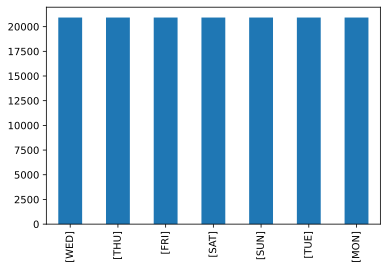

In [145]:
data.day.value_counts().plot(kind="bar")

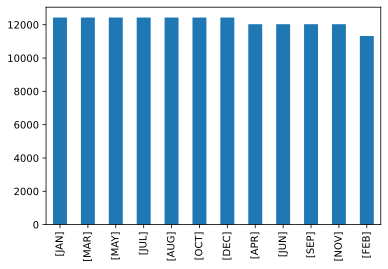

In [146]:
data.month.value_counts().plot(kind="bar")

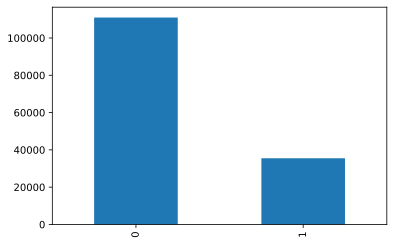

In [147]:
data.leap_year.value_counts().plot(kind="bar")

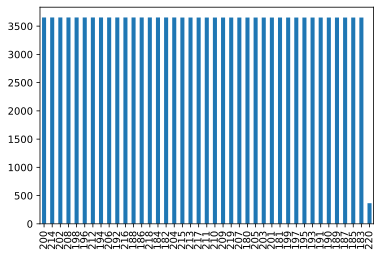

In [148]:
data.decade.value_counts().plot(kind="bar")

In [149]:
data

day  month  leap_year  decade       date  date_int  day_code  \
0       [WED]  [JAN]          0     180 1800-01-01  18000101         4   
1       [THU]  [JAN]          0     180 1801-01-01  18010101         5   
2       [FRI]  [JAN]          0     180 1802-01-01  18020101         6   
3       [SAT]  [JAN]          0     180 1803-01-01  18030101         0   
4       [SUN]  [JAN]          1     180 1804-01-01  18040101         1   
...       ...    ...        ...     ...        ...       ...       ...   
146457  [SAT]  [DEC]          1     219 2196-12-31  21961231         0   
146458  [SUN]  [DEC]          0     219 2197-12-31  21971231         1   
146459  [MON]  [DEC]          0     219 2198-12-31  21981231         2   
146460  [TUE]  [DEC]          0     219 2199-12-31  21991231         3   
146461  [WED]  [DEC]          0     220 2200-12-31  22001231         4   

        day_scaled   day_sin   day_cos  month_code  month_scaled  month_sin  \
0             0.25 -0.433884 -0.900969           0     -1.000000        0.0   
1             0.50 -0.974928 -0.222521           0     -1.000000        0.0   
2             0.75 -0.781831  0.623490           0     -1.000000        0.0   
3            -0.75  0.000000  1.000000           0     -1.000000        0.0   
4            -0.50  0.781831  0.623490           0     -1.000000        0.0   
...            ...       ...       ...         ...           ...        ...   
146457       -0.75  0.000000  1.000000          11      0.833333       -0.5   
146458       -0.50  0.781831  0.623490          11      0.833333       -0.5   
146459       -0.25  0.974928 -0.222521          11      0.833333       -0.5   
146460        0.00  0.433884 -0.900969          11      0.833333       -0.5   
146461        0.25 -0.433884 -0.900969          11      0.833333       -0.5   

        month_cos  decade_scaled  decade_sin  decade_cos  
0        1.000000          -1.00    0.636242   -0.771489  
1        1.000000          -1.00    0.636242   -0.771489  
2        1.000000          -1.00    0.636242   -0.771489  
3        1.000000          -1.00    0.636242   -0.771489  
4        1.000000          -1.00    0.636242   -0.771489  
...           ...            ...         ...         ...  
146457   0.866025           0.95    0.839365   -0.543568  
146458   0.866025           0.95    0.839365   -0.543568  
146459   0.866025           0.95    0.839365   -0.543568  
146460   0.866025           0.95    0.839365   -0.543568  
146461   0.866025           1.00    0.746553   -0.665326  

[146462 rows x 17 columns]

In [150]:
data.dtypes

day                      object
month                    object
leap_year                 int64
decade                    int64
date             datetime64[ns]
date_int                  int64
day_code                  int64
day_scaled              float64
day_sin                 float64
day_cos                 float64
month_code                int64
month_scaled            float64
month_sin               float64
month_cos               float64
decade_scaled           float64
decade_sin              float64
decade_cos              float64
dtype: object

['day_sin', 'day_cos', 'month_sin', 'month_cos', 'leap_year', 'decade_scaled']
['date_timestamp_scaled']

In [151]:
X = data[['day_scaled', 'day_sin', 'day_cos', 'month_scaled', 'month_sin', 'month_cos', 
          'leap_year', 'decade_scaled', 'decade_sin', 'decade_cos']].values
X

array([[ 0.25      , -0.43388374, -0.90096887, ..., -1.        ,
         0.63624244, -0.77148918],
       [ 0.5       , -0.97492791, -0.22252093, ..., -1.        ,
         0.63624244, -0.77148918],
       [ 0.75      , -0.78183148,  0.6234898 , ..., -1.        ,
         0.63624244, -0.77148918],
       ...,
       [-0.25      ,  0.97492791, -0.22252093, ...,  0.95      ,
         0.83936543, -0.54356755],
       [ 0.        ,  0.43388374, -0.90096887, ...,  0.95      ,
         0.83936543, -0.54356755],
       [ 0.25      , -0.43388374, -0.90096887, ...,  1.        ,
         0.74655322, -0.6653257 ]])

In [152]:
len(X)

146462

In [153]:
X.shape

(146462, 10)

In [154]:
# Y = data['date_int'].values.reshape(-1, 1)
# Y = np.log(data['date_int'].values.reshape(-1, 1))
# Y = data['date_int'].values.reshape(-1, 1) / data['date_int'].max()


ls = []

for s in data['date_int'].astype(str).to_list():

  l = list(s)

  ls.append(l)



arr = np.array(ls).astype(int)

ll = pd.DataFrame(arr, index=np.arange(len(data['date_int'])), columns=['y1', 'y2', 'y3', 'y4', 'm1', 'm2', 'd1', 'd2'])


Y = ll.values

Y


array([[1, 8, 0, ..., 1, 0, 1],
       [1, 8, 0, ..., 1, 0, 1],
       [1, 8, 0, ..., 1, 0, 1],
       ...,
       [2, 1, 9, ..., 2, 3, 1],
       [2, 1, 9, ..., 2, 3, 1],
       [2, 2, 0, ..., 2, 3, 1]])

In [155]:
len(Y)

146462

In [156]:
Y.shape

(146462, 8)

In [157]:
# # leap = np.where(~X['leap_year'] == 1)[0]
# leap = np.where(X['leap_year'] == 1)[0]

# leap

In [158]:
train_data, test_data, train_labels, test_labels = train_test_split(X, Y, test_size=0.3, shuffle=True,
                                                                    random_state=0)

In [159]:
train_dataT = TensorDataset( torch.tensor(train_data).float(), torch.tensor(train_labels).float() )

test_dataT  = TensorDataset( torch.tensor(test_data).float(), torch.tensor(test_labels).float() )



batchsize = 32
# batchsize = 64


train_loader = DataLoader(train_dataT, batch_size=batchsize, drop_last=True)

test_loader  = DataLoader(test_dataT)


In [160]:
print(f'X: {X.shape}\n')
print(f'Y: {Y.shape}\n')

print(f'Train data:   {train_data.shape}\n')
print(f'Train labels: {train_labels.shape}\n')
print(f'Test data:    {test_data.shape}\n')
print(f'Test labels:  {test_labels.shape}')

X: (146462, 10)

Y: (146462, 8)

Train data:   (102523, 10)

Train labels: (102523, 8)

Test data:    (43939, 10)

Test labels:  (43939, 8)


In [161]:
102523 % 32, 102523 % 64

(27, 59)

In [162]:
class Model(nn.Module):
    
    def __init__(self):
        super().__init__()

        self.input = nn.Linear(10, 32)

        self.fc1 = nn.Linear(32, 128)
        self.bnorm1 = nn.BatchNorm1d(128)

        self.fc2 = nn.Linear(128, 512)
        self.bnorm2 = nn.BatchNorm1d(512)

        self.fc3 = nn.Linear(512, 64)
        self.bnorm3 = nn.BatchNorm1d(64)

        self.fc4 = nn.Linear(64, 32)
        self.bnorm4 = nn.BatchNorm1d(32)


        self.output = nn.Linear(32, 8)



    def forward(self, x):


        # print(f'training={self.training}')

        x = F.relu( self.input(x) )

        x = F.relu(self.bnorm1(self.fc1(x)))
        x = F.dropout(x, p=0.25, training=self.training)

        x = F.relu(self.bnorm2(self.fc2(x)))
        x = F.dropout(x, p=0.4, training=self.training)

        x = F.relu(self.bnorm3(self.fc3(x)))
        x = F.dropout(x, p=0.1, training=self.training)

        x = F.relu(self.bnorm4(self.fc4(x)))
        x = F.dropout(x, p=0.05, training=self.training)


        x = F.relu(self.output(x))
        # x = self.output(x)
        


        return x
        


In [163]:
# test_x, test_y = next(iter(train_loader))

# print(f'X: {X.shape}\n')
# print(f'Y: {Y.shape}\n')



In [164]:
def train(model, numepochs):

    numepochs = numepochs

    model = model
    
    
    
    lossfun = nn.MSELoss()
    # lossfun = nn.L1Loss()


    # optimizer = torch.optim.Adam(model.parameters(), lr=0.0002, betas=(0.5, 0.999), weight_decay=1e-5)
    # optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.5, 0.999), weight_decay=1e-1)
    # optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-5)

    # optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, betas=(0.9, 0.999), weight_decay=1e-9)


    # optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), weight_decay=0.01)
    
    # optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999))
    # optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    
    
    
    trainLoss = torch.zeros(numepochs)
    testLoss  = torch.zeros(numepochs)
    trainAcc  = torch.zeros(numepochs)
    # testAcc   = torch.zeros(numepochs)


    for epochi in range(numepochs):

        model.train() # switch to train mode

        batchLoss = []
        batchAcc  = []

        for X,y in train_loader:

            X = X.to(device)
            y = y.to(device)

            yHat = model(X)
            loss = lossfun(yHat, y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            batchLoss.append(loss.item())
            # batchAcc.append( torch.mean(( yHat == y).float() ).item() )
            # batchAcc.append( torch.mean( (torch.abs(yHat - y) < 1).float() ).item() ) # <1 for rounding
            batchAcc.append( r2_score(y.detach().cpu().numpy(), yHat.detach().cpu().numpy()) )
            




        trainLoss[epochi] = np.mean(batchLoss)
        # trainAcc[epochi]  = 100*np.mean(batchAcc)
        trainAcc[epochi]  = np.mean(batchAcc)
        



        model.eval() # switch to test mode

        XX,yy = next(iter(test_loader))

        XX = XX.to(device)
        yy = yy.to(device)

        # forward pass and loss
        with torch.no_grad():
            yHat_test = model(XX)
            loss = lossfun(yHat_test, yy)


        testLoss[epochi] = loss.item()
        # testAcc[epochi]  = 100*torch.mean( (yHat_test == yy).float() ).item()
        # testAcc[epochi]  = 100*torch.mean( (torch.abs(yHat_test - yy) < 1).float() ).item()
        # testAcc[epochi]  = 100*r2_score(yy.detach().numpy(), yHat_test.detach().numpy())
        


        # if (epochi + 1) % 5 == 0:
        print(f'Epoch {epochi+1}/{numepochs}, Train Loss: {loss.item():0.6f}, Test Loss: {loss.item():0.6f}')


        
    return trainLoss.cpu(), testLoss.cpu(), trainAcc.cpu(), yHat.cpu(), y.cpu(), yHat_test.cpu(), yy.cpu()


In [165]:
model = Model().to(device)

# test_hat = model(torch.randn(32,6))
# test_hat = model(test_x)

# print(test_hat.shape)


checkpoint = torch.load('checkpoint.pth.tar', map_location=torch.device('cpu'))
model.load_state_dict(checkpoint['model_state_dict'])




<All keys matched successfully>

In [166]:
# for p in list(model.named_parameters()):
#     if 'weight' in p[0] and 'bnorm' not in p[0]:
#         nn.init.xavier_normal_(p[1].data)
#         print(p[0])
#         print(p[1].data.shape)

In [167]:
# numepochs = 120
numepochs = 300


trainLoss1, testLoss1, trainAcc1, yHat1, y1, yHat_test1, yy1 = train(model, numepochs)


Epoch 1/300, Train Loss: 1.991747, Test Loss: 1.991747
Epoch 2/300, Train Loss: 2.005375, Test Loss: 2.005375
Epoch 3/300, Train Loss: 2.036106, Test Loss: 2.036106
Epoch 4/300, Train Loss: 2.003370, Test Loss: 2.003370
Epoch 5/300, Train Loss: 2.003080, Test Loss: 2.003080
Epoch 6/300, Train Loss: 2.015101, Test Loss: 2.015101
Epoch 7/300, Train Loss: 2.065706, Test Loss: 2.065706
Epoch 8/300, Train Loss: 2.031293, Test Loss: 2.031293
Epoch 9/300, Train Loss: 2.046420, Test Loss: 2.046420
Epoch 10/300, Train Loss: 2.157187, Test Loss: 2.157187
Epoch 11/300, Train Loss: 2.002823, Test Loss: 2.002823
Epoch 12/300, Train Loss: 2.022420, Test Loss: 2.022420
Epoch 13/300, Train Loss: 2.018017, Test Loss: 2.018017
Epoch 14/300, Train Loss: 2.029316, Test Loss: 2.029316
Epoch 15/300, Train Loss: 1.958915, Test Loss: 1.958915
Epoch 16/300, Train Loss: 2.008224, Test Loss: 2.008224
Epoch 17/300, Train Loss: 2.021120, Test Loss: 2.021120
Epoch 18/300, Train Loss: 2.075067, Test Loss: 2.075067
E

In [168]:
checkpoint = {'model_state_dict'      : model.state_dict(),
              #'model_smote_state_dict': model_smote.state_dict(),

              'scaler_day' : scaler_day,
              'scaler_month' : scaler_month,
              'scaler_decade' : scaler_decade,

              #'scaler_day_smote' : scaler_day_smote,
              #'scaler_month_smote' : scaler_month_smote,
              #'scaler_decade_smote' : scaler_decade_smote,
              
              'alpha': alpha,
              #'alpha_smote': alpha_smote
              }



torch.save(checkpoint, 'checkpoint1.pth.tar')


In [169]:
# r2_score(y.detach().numpy(), yHat.detach().numpy())
# type(r2_score(y.detach(), yHat.detach()))

In [170]:
# torch.mean( r2_score(y.detach().numpy(), yHat.detach().numpy()) ).item()

In [171]:
trainLoss1, testLoss1, trainAcc1

(tensor([2.2936, 2.2941, 2.2921, 2.2946, 2.2935, 2.2937, 2.2930, 2.2929, 2.2928,
         2.2938, 2.2930, 2.2923, 2.2952, 2.2924, 2.2941, 2.2915, 2.2923, 2.2921,
         2.2906, 2.2914, 2.2908, 2.2925, 2.2913, 2.2919, 2.2947, 2.2923, 2.2928,
         2.2912, 2.2900, 2.2922, 2.2895, 2.2916, 2.2910, 2.2908, 2.2906, 2.2917,
         2.2898, 2.2891, 2.2919, 2.2897, 2.2917, 2.2888, 2.2904, 2.2897, 2.2883,
         2.2909, 2.2899, 2.2900, 2.2901, 2.2898, 2.2888, 2.2888, 2.2887, 2.2889,
         2.2906, 2.2874, 2.2907, 2.2887, 2.2891, 2.2880, 2.2892, 2.2893, 2.2889,
         2.2883, 2.2895, 2.2881, 2.2878, 2.2885, 2.2886, 2.2886, 2.2880, 2.2875,
         2.2874, 2.2901, 2.2874, 2.2870, 2.2896, 2.2874, 2.2898, 2.2873, 2.2855,
         2.2865, 2.2868, 2.2863, 2.2875, 2.2871, 2.2878, 2.2883, 2.2870, 2.2869,
         2.2866, 2.2860, 2.2861, 2.2872, 2.2862, 2.2874, 2.2858, 2.2863, 2.2856,
         2.2841, 2.2866, 2.2860, 2.2866, 2.2852, 2.2868, 2.2859, 2.2836, 2.2871,
         2.2856, 2.2867, 2.2

In [172]:
# batchLoss

In [173]:
# batchAcc

In [174]:
# yHat.shape, y.shape

In [175]:
# yHat_test.shape, yy.shape

In [176]:
yHat1.flatten(), y1.flatten()

(tensor([1.8024e+00, 4.6606e-01, 7.9658e+00, 4.3778e+00, 6.6074e-03, 2.8523e+00,
         1.1219e+00, 4.4303e+00, 2.0376e+00, 0.0000e+00, 7.3609e+00, 4.5171e+00,
         5.7810e-01, 1.9189e+00, 1.1326e+00, 4.6496e+00, 1.9785e+00, 0.0000e+00,
         4.4898e+00, 4.5507e+00, 0.0000e+00, 3.3705e+00, 1.1463e+00, 4.5297e+00,
         1.9624e+00, 6.2646e-01, 4.4879e+00, 4.5646e+00, 0.0000e+00, 6.3187e+00,
         1.1032e+00, 4.5081e+00, 1.9199e+00, 1.5892e+00, 7.7667e+00, 4.4732e+00,
         0.0000e+00, 8.4493e+00, 1.0978e+00, 4.3501e+00, 9.4006e-01, 9.0472e+00,
         4.6623e+00, 4.5175e+00, 6.3145e-01, 1.4827e+00, 1.1302e+00, 4.4516e+00,
         1.1039e+00, 7.5029e+00, 0.0000e+00, 4.4678e+00, 0.0000e+00, 3.0600e+00,
         1.0864e+00, 4.6117e+00, 1.9884e+00, 0.0000e+00, 8.8210e+00, 4.4410e+00,
         5.8175e-01, 1.8140e+00, 1.1340e+00, 4.6502e+00, 9.1857e-01, 9.0577e+00,
         5.7217e+00, 4.4704e+00, 5.7621e-01, 1.9263e+00, 1.1116e+00, 4.4471e+00,
         9.2164e-01, 8.9681e

In [177]:
yHat_test1, yy1

(tensor([[1.0700, 7.8713, 1.3614, 4.4966, 0.0000, 5.7814, 1.1191, 4.5591]]),
 tensor([[1., 8., 1., 6., 0., 6., 0., 1.]]))

In [178]:
yy1

tensor([[1., 8., 1., 6., 0., 6., 0., 1.]])

In [179]:
(yHat_test1).round()

tensor([[1., 8., 1., 4., 0., 6., 1., 5.]])

In [180]:
(yHat1.flatten()).round(), (y1.flatten()).round()

(tensor([2., 0., 8., 4., 0., 3., 1., 4., 2., 0., 7., 5., 1., 2., 1., 5., 2., 0.,
         4., 5., 0., 3., 1., 5., 2., 1., 4., 5., 0., 6., 1., 5., 2., 2., 8., 4.,
         0., 8., 1., 4., 1., 9., 5., 5., 1., 1., 1., 4., 1., 8., 0., 4., 0., 3.,
         1., 5., 2., 0., 9., 4., 1., 2., 1., 5., 1., 9., 6., 4., 1., 2., 1., 4.,
         1., 9., 0., 4., 0., 7., 1., 5., 2., 1., 6., 5., 0., 9., 1., 5., 2., 1.,
         7., 4., 0., 2., 1., 4., 2., 0., 8., 5., 0., 5., 1., 5., 2., 0., 7., 4.,
         1., 1., 1., 5., 1., 9., 0., 5., 0., 6., 1., 4., 1., 8., 0., 5., 0., 9.,
         1., 5., 1., 9., 3., 4., 0., 6., 1., 5., 2., 1., 5., 5., 1., 2., 1., 4.,
         2., 1., 6., 5., 1., 0., 1., 5., 2., 0., 8., 4., 1., 2., 1., 5., 1., 9.,
         7., 4., 1., 0., 1., 4., 1., 9., 2., 4., 0., 7., 1., 4., 1., 8., 0., 5.,
         0., 8., 1., 5., 1., 8., 1., 4., 0., 3., 1., 4., 1., 8., 7., 4., 0., 4.,
         1., 4., 1., 8., 9., 4., 0., 2., 1., 4., 2., 0., 4., 5., 0., 7., 1., 4.,
         1., 9., 4., 4., 0.,

In [181]:
print_score(X.shape, yHat1, y1, yHat_test1, yy1)

Adjusted R-Squared(y, yHat): 0.5515


mean_absolute_error(y, yHat): 0.8714

mean_absolute_error(yy, yHat_test): 0.8700


mean_squared_error(y, yHat): 2.3807

mean_squared_error(yy, yHat_test): 2.0474


mean_squared_log_error(y, yHat): 0.1837

mean_squared_log_error(yy, yHat_test): 0.2122


RMSE(y, yHat): 1.5430

RMSE(yy, yHat_test): 1.4309




In [182]:
# create a 1D smoothing filter
def smooth(x, k=15):
    return np.convolve(x, np.ones(k)/k, mode='same')



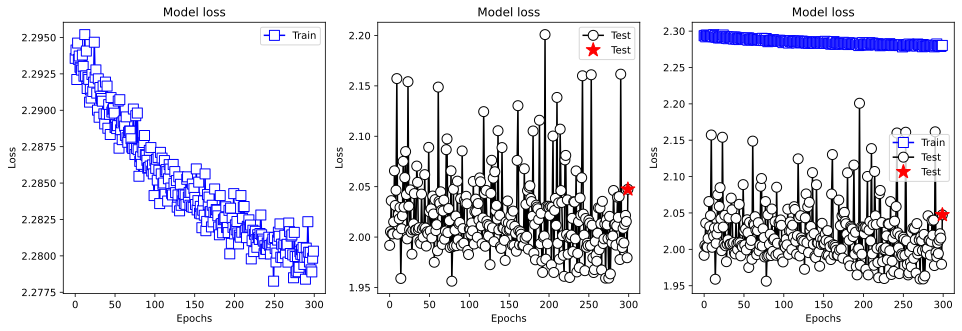

In [183]:
fig,ax = plt.subplots(1, 3, figsize=(16, 5))

# ax[0].plot(smooth(trainLoss))
# ax[0].plot(smooth(testLoss))
ax[0].plot(trainLoss1, 'sb-', markerfacecolor='w', markersize=10, label='Train')

ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Model loss')
ax[0].legend()



ax[1].plot(testLoss1, 'ko-', markerfacecolor='w', markersize=10, label='Test')
ax[1].plot(len(testLoss1) - 1, testLoss1[-1], 'r*', markersize=15, label='Test')

ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_title('Model loss')
# ax[1].set_ylim([0, 0.5])
ax[1].legend()



ax[2].plot(trainLoss1, 'sb-', markerfacecolor='w', markersize=10, label='Train')
ax[2].plot(testLoss1, 'ko-', markerfacecolor='w', markersize=10, label='Test')
ax[2].plot(len(testLoss1) - 1, testLoss1[-1], 'r*', markersize=15, label='Test')

ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Loss')
ax[2].set_title('Model loss')
ax[2].legend()




# plt.ylim([0,1])
# plt.xlim([-10,10]) # note: this actually clips two data points


plt.savefig("loss1.jpg", bbox_inches='tight')


plt.show()

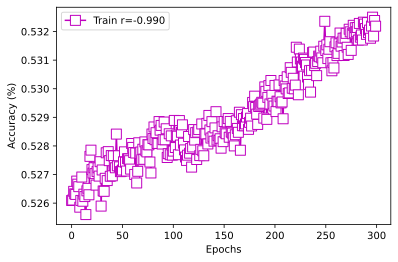

In [184]:
plt.plot(trainAcc1, 'ms-', markerfacecolor='w', markersize=10, label='Train')

plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')

# correlations between predictions and outputs
corrTrain = np.corrcoef(yHat1.detach().T, y1.T) [1,0]

plt.legend([ f'Train r={corrTrain:0.3f}'])


plt.savefig("acc1.jpg", bbox_inches='tight')


plt.show()

In [185]:
data.leap_year.value_counts()

0    110960
1     35502
Name: leap_year, dtype: int64

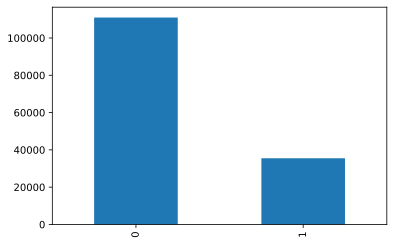

In [186]:
data.leap_year.value_counts().plot(kind="bar")

In [187]:
resampler = SMOTE(k_neighbors=20, random_state=0)

In [188]:
X_res, y_res = resampler.fit_resample(data[['day_code', 'month_code', 'decade', 'date_int']], data['leap_year'])

In [189]:
y_res.value_counts()

0    110960
1    110960
Name: leap_year, dtype: int64

In [190]:
data['leap_year'].value_counts()

0    110960
1     35502
Name: leap_year, dtype: int64

In [191]:
data

day  month  leap_year  decade       date  date_int  day_code  \
0       [WED]  [JAN]          0     180 1800-01-01  18000101         4   
1       [THU]  [JAN]          0     180 1801-01-01  18010101         5   
2       [FRI]  [JAN]          0     180 1802-01-01  18020101         6   
3       [SAT]  [JAN]          0     180 1803-01-01  18030101         0   
4       [SUN]  [JAN]          1     180 1804-01-01  18040101         1   
...       ...    ...        ...     ...        ...       ...       ...   
146457  [SAT]  [DEC]          1     219 2196-12-31  21961231         0   
146458  [SUN]  [DEC]          0     219 2197-12-31  21971231         1   
146459  [MON]  [DEC]          0     219 2198-12-31  21981231         2   
146460  [TUE]  [DEC]          0     219 2199-12-31  21991231         3   
146461  [WED]  [DEC]          0     220 2200-12-31  22001231         4   

        day_scaled   day_sin   day_cos  month_code  month_scaled  month_sin  \
0             0.25 -0.433884 -0.900969           0     -1.000000        0.0   
1             0.50 -0.974928 -0.222521           0     -1.000000        0.0   
2             0.75 -0.781831  0.623490           0     -1.000000        0.0   
3            -0.75  0.000000  1.000000           0     -1.000000        0.0   
4            -0.50  0.781831  0.623490           0     -1.000000        0.0   
...            ...       ...       ...         ...           ...        ...   
146457       -0.75  0.000000  1.000000          11      0.833333       -0.5   
146458       -0.50  0.781831  0.623490          11      0.833333       -0.5   
146459       -0.25  0.974928 -0.222521          11      0.833333       -0.5   
146460        0.00  0.433884 -0.900969          11      0.833333       -0.5   
146461        0.25 -0.433884 -0.900969          11      0.833333       -0.5   

        month_cos  decade_scaled  decade_sin  decade_cos  
0        1.000000          -1.00    0.636242   -0.771489  
1        1.000000          -1.00    0.636242   -0.771489  
2        1.000000          -1.00    0.636242   -0.771489  
3        1.000000          -1.00    0.636242   -0.771489  
4        1.000000          -1.00    0.636242   -0.771489  
...           ...            ...         ...         ...  
146457   0.866025           0.95    0.839365   -0.543568  
146458   0.866025           0.95    0.839365   -0.543568  
146459   0.866025           0.95    0.839365   -0.543568  
146460   0.866025           0.95    0.839365   -0.543568  
146461   0.866025           1.00    0.746553   -0.665326  

[146462 rows x 17 columns]

In [192]:
y_res

0         0
1         0
2         0
3         0
4         1
         ..
221915    1
221916    1
221917    1
221918    1
221919    1
Name: leap_year, Length: 221920, dtype: int64

In [193]:
X_res

day_code  month_code  decade  date_int
0              4           0     180  18000101
1              5           0     180  18010101
2              6           0     180  18020101
3              0           0     180  18030101
4              1           0     180  18040101
...          ...         ...     ...       ...
221915         0           5     188  18880618
221916         2           6     188  18840705
221917         5           2     218  21800323
221918         1           5     199  19960602
221919         1           4     219  21960520

[221920 rows x 4 columns]

In [194]:
X_smote = X_res.assign(leap_year=y_res)

In [195]:
X_smote

day_code  month_code  decade  date_int  leap_year
0              4           0     180  18000101          0
1              5           0     180  18010101          0
2              6           0     180  18020101          0
3              0           0     180  18030101          0
4              1           0     180  18040101          1
...          ...         ...     ...       ...        ...
221915         0           5     188  18880618          1
221916         2           6     188  18840705          1
221917         5           2     218  21800323          1
221918         1           5     199  19960602          1
221919         1           4     219  21960520          1

[221920 rows x 5 columns]

Drop 220 decade

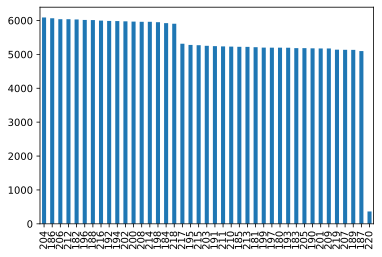

In [196]:
# data.decade.value_counts().plot(kind="bar")
X_smote.decade.value_counts().plot(kind="bar")

In [197]:
# data.decade.value_counts()[-5:]
X_smote.decade.value_counts()[-5:]

219    5139
207    5134
189    5133
187    5098
220     365
Name: decade, dtype: int64

In [198]:
X_smote = X_smote.drop(X_smote.index[X_smote['decade'] == 220]).reset_index(drop=True)
X_smote

day_code  month_code  decade  date_int  leap_year
0              4           0     180  18000101          0
1              5           0     180  18010101          0
2              6           0     180  18020101          0
3              0           0     180  18030101          0
4              1           0     180  18040101          1
...          ...         ...     ...       ...        ...
221550         0           5     188  18880618          1
221551         2           6     188  18840705          1
221552         5           2     218  21800323          1
221553         1           5     199  19960602          1
221554         1           4     219  21960520          1

[221555 rows x 5 columns]

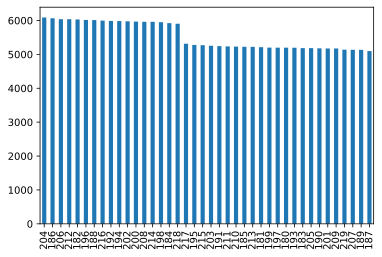

In [199]:
X_smote.decade.value_counts().plot(kind="bar")

In [200]:
X_smote.decade.value_counts()[-5:]

209    5174
219    5139
207    5134
189    5133
187    5098
Name: decade, dtype: int64

code is required to only work for dates in the range  [ 1-1-1800 to 31-12-2200 ]

In [201]:
X_smote.date_int.max()

21991231

In [202]:
datetime.datetime.strptime(str(X_smote.date_int.max()), '%Y%m%d').strftime('%d-%m-%Y')

'31-12-2199'

In [203]:
X_smote.date_int.min()

18000101

In [204]:
datetime.datetime.strptime(str(X_smote.date_int.min()), '%Y%m%d').strftime('%d-%m-%Y')

'01-01-1800'

In [205]:
Y_smote = X_smote['date_int']
Y_smote

0         18000101
1         18010101
2         18020101
3         18030101
4         18040101
            ...   
221550    18880618
221551    18840705
221552    21800323
221553    19960602
221554    21960520
Name: date_int, Length: 221555, dtype: int64

In [206]:
X_smote = X_smote.drop('date_int', axis=1).reset_index(drop=True)
X_smote

day_code  month_code  decade  leap_year
0              4           0     180          0
1              5           0     180          0
2              6           0     180          0
3              0           0     180          0
4              1           0     180          1
...          ...         ...     ...        ...
221550         0           5     188          1
221551         2           6     188          1
221552         5           2     218          1
221553         1           5     199          1
221554         1           4     219          1

[221555 rows x 4 columns]

In [207]:
Y_smote = Y_smote.reset_index(drop=True)

ls = []

for s in Y_smote.astype(str).to_list():

  l = list(s)

  ls.append(l)



arr = np.array(ls).astype(int)

ll = pd.DataFrame(arr, index=np.arange(len(Y_smote)), columns=['y1', 'y2', 'y3', 'y4', 'm1', 'm2', 'd1', 'd2'])


Y_smote = ll.values

Y_smote




array([[1, 8, 0, ..., 1, 0, 1],
       [1, 8, 0, ..., 1, 0, 1],
       [1, 8, 0, ..., 1, 0, 1],
       ...,
       [2, 1, 8, ..., 3, 2, 3],
       [1, 9, 9, ..., 6, 0, 2],
       [2, 1, 9, ..., 5, 2, 0]])

In [208]:
# data.index[data['leap_year'] == 1].tolist()
# data.index[data['leap_year'] == 1]

In [209]:
# for i,idx in enumerate(data['leap_year'].tolist()):
#     print(i, idx)

0 0
1 0
2 0
3 0
4 1 <---
5 0
6 0
7 0
8 1 <---
9 0
10 0
11 0
12 1 <---
13 0
14 0
15 0
16 1 <---
17 0
18 0
19 0
20 1 <---
21 0
22 0
23 0
24 1 <---
25 0
26 0
27 0
28 1 <---
29 0
30 0

In [210]:
scaler_day_smote = RobustScaler()

x = X_smote.day_code.values.reshape(-1, 1)

X_smote['day_scaled'] = scaler_day_smote.fit_transform(x).flatten()


In [211]:
X_smote['day_sin'] = np.sin(X_smote['day_code'] * (2 * np.pi / 7))
X_smote['day_cos'] = np.cos(X_smote['day_code'] * (2 * np.pi / 7))

In [212]:
X_smote

day_code  month_code  decade  leap_year  day_scaled   day_sin  \
0              4           0     180          0    0.333333 -0.433884   
1              5           0     180          0    0.666667 -0.974928   
2              6           0     180          0    1.000000 -0.781831   
3              0           0     180          0   -1.000000  0.000000   
4              1           0     180          1   -0.666667  0.781831   
...          ...         ...     ...        ...         ...       ...   
221550         0           5     188          1   -1.000000  0.000000   
221551         2           6     188          1   -0.333333  0.974928   
221552         5           2     218          1    0.666667 -0.974928   
221553         1           5     199          1   -0.666667  0.781831   
221554         1           4     219          1   -0.666667  0.781831   

         day_cos  
0      -0.900969  
1      -0.222521  
2       0.623490  
3       1.000000  
4       0.623490  
...          ...  
221550  1.000000  
221551 -0.222521  
221552 -0.222521  
221553  0.623490  
221554  0.623490  

[221555 rows x 7 columns]

In [213]:
scaler_month_smote = RobustScaler()

x = X_smote.month_code.values.reshape(-1, 1)

X_smote['month_scaled'] = scaler_month_smote.fit_transform(x).flatten()


In [214]:
X_smote['month_sin'] = np.sin(X_smote['month_code'] * (2 * np.pi / 12))
X_smote['month_cos'] = np.cos(X_smote['month_code'] * (2 * np.pi / 12))

In [215]:
X_smote

day_code  month_code  decade  leap_year  day_scaled   day_sin  \
0              4           0     180          0    0.333333 -0.433884   
1              5           0     180          0    0.666667 -0.974928   
2              6           0     180          0    1.000000 -0.781831   
3              0           0     180          0   -1.000000  0.000000   
4              1           0     180          1   -0.666667  0.781831   
...          ...         ...     ...        ...         ...       ...   
221550         0           5     188          1   -1.000000  0.000000   
221551         2           6     188          1   -0.333333  0.974928   
221552         5           2     218          1    0.666667 -0.974928   
221553         1           5     199          1   -0.666667  0.781831   
221554         1           4     219          1   -0.666667  0.781831   

         day_cos  month_scaled     month_sin  month_cos  
0      -0.900969     -1.000000  0.000000e+00   1.000000  
1      -0.222521     -1.000000  0.000000e+00   1.000000  
2       0.623490     -1.000000  0.000000e+00   1.000000  
3       1.000000     -1.000000  0.000000e+00   1.000000  
4       0.623490     -1.000000  0.000000e+00   1.000000  
...          ...           ...           ...        ...  
221550  1.000000     -0.166667  5.000000e-01  -0.866025  
221551 -0.222521      0.000000  1.224647e-16  -1.000000  
221552 -0.222521     -0.666667  8.660254e-01   0.500000  
221553  0.623490     -0.166667  5.000000e-01  -0.866025  
221554  0.623490     -0.333333  8.660254e-01  -0.500000  

[221555 rows x 10 columns]

In [216]:
scaler_decade_smote = RobustScaler()

x = X_smote.decade.values.reshape(-1, 1)

X_smote['decade_scaled'] = scaler_decade_smote.fit_transform(x).flatten()


In [217]:
# alpha_smote = len(X_smote.decade.unique())
alpha_smote = (X_smote.decade.iloc[-1] - X_smote.decade.iloc[0]) + 1

X_smote['decade_sin'] = np.sin(X_smote['decade'] * (2 * np.pi / alpha_smote))
X_smote['decade_cos'] = np.cos(X_smote['decade'] * (2 * np.pi / alpha_smote))

In [218]:
X_smote

day_code  month_code  decade  leap_year  day_scaled   day_sin  \
0              4           0     180          0    0.333333 -0.433884   
1              5           0     180          0    0.666667 -0.974928   
2              6           0     180          0    1.000000 -0.781831   
3              0           0     180          0   -1.000000  0.000000   
4              1           0     180          1   -0.666667  0.781831   
...          ...         ...     ...        ...         ...       ...   
221550         0           5     188          1   -1.000000  0.000000   
221551         2           6     188          1   -0.333333  0.974928   
221552         5           2     218          1    0.666667 -0.974928   
221553         1           5     199          1   -0.666667  0.781831   
221554         1           4     219          1   -0.666667  0.781831   

         day_cos  month_scaled     month_sin  month_cos  decade_scaled  \
0      -0.900969     -1.000000  0.000000e+00   1.000000      -1.052632   
1      -0.222521     -1.000000  0.000000e+00   1.000000      -1.052632   
2       0.623490     -1.000000  0.000000e+00   1.000000      -1.052632   
3       1.000000     -1.000000  0.000000e+00   1.000000      -1.052632   
4       0.623490     -1.000000  0.000000e+00   1.000000      -1.052632   
...          ...           ...           ...        ...            ...   
221550  1.000000     -0.166667  5.000000e-01  -0.866025      -0.631579   
221551 -0.222521      0.000000  1.224647e-16  -1.000000      -0.631579   
221552 -0.222521     -0.666667  8.660254e-01   0.500000       0.947368   
221553  0.623490     -0.166667  5.000000e-01  -0.866025      -0.052632   
221554  0.623490     -0.333333  8.660254e-01  -0.500000       1.000000   

          decade_sin  decade_cos  
0       1.102182e-15   -1.000000  
1       1.102182e-15   -1.000000  
2       1.102182e-15   -1.000000  
3       1.102182e-15   -1.000000  
4       1.102182e-15   -1.000000  
...              ...         ...  
221550 -9.510565e-01   -0.309017  
221551 -9.510565e-01   -0.309017  
221552  3.090170e-01   -0.951057  
221553 -1.564345e-01    0.987688  
221554  1.564345e-01   -0.987688  

[221555 rows x 13 columns]

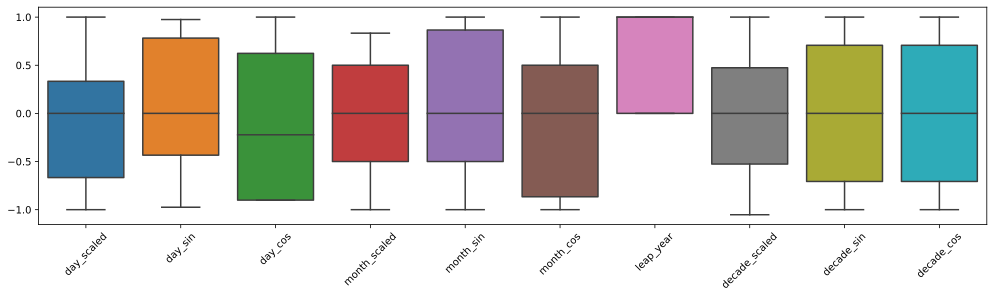

In [257]:
fig,ax = plt.subplots(1,figsize=(17,4))

ax = sns.boxplot(data=X_smote[['day_scaled', 'day_sin', 'day_cos', 'month_scaled', 'month_sin', 'month_cos', 
          'leap_year', 'decade_scaled', 'decade_sin', 'decade_cos']])

ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

In [220]:
X = X_smote[['day_scaled', 'day_sin', 'day_cos', 'month_scaled', 'month_sin', 'month_cos', 
             'leap_year', 'decade_scaled', 'decade_sin', 'decade_cos']].values
X

array([[ 3.33333333e-01, -4.33883739e-01, -9.00968868e-01, ...,
        -1.05263158e+00,  1.10218212e-15, -1.00000000e+00],
       [ 6.66666667e-01, -9.74927912e-01, -2.22520934e-01, ...,
        -1.05263158e+00,  1.10218212e-15, -1.00000000e+00],
       [ 1.00000000e+00, -7.81831482e-01,  6.23489802e-01, ...,
        -1.05263158e+00,  1.10218212e-15, -1.00000000e+00],
       ...,
       [ 6.66666667e-01, -9.74927912e-01, -2.22520934e-01, ...,
         9.47368421e-01,  3.09016994e-01, -9.51056516e-01],
       [-6.66666667e-01,  7.81831482e-01,  6.23489802e-01, ...,
        -5.26315789e-02, -1.56434465e-01,  9.87688341e-01],
       [-6.66666667e-01,  7.81831482e-01,  6.23489802e-01, ...,
         1.00000000e+00,  1.56434465e-01, -9.87688341e-01]])

In [221]:
X.shape

(221555, 10)

In [222]:
# Y = data['date_int'].values.reshape(-1, 1)
# Y = np.log(data['date_int'].values.reshape(-1, 1))
# Y = data['date_int'].values.reshape(-1, 1) / data['date_int'].max()
# Y = data['date_normalized'].values.reshape(-1, 1)
Y = Y_smote


Y

array([[1, 8, 0, ..., 1, 0, 1],
       [1, 8, 0, ..., 1, 0, 1],
       [1, 8, 0, ..., 1, 0, 1],
       ...,
       [2, 1, 8, ..., 3, 2, 3],
       [1, 9, 9, ..., 6, 0, 2],
       [2, 1, 9, ..., 5, 2, 0]])

In [223]:
Y.shape

(221555, 8)

In [224]:
train_data, test_data, train_labels, test_labels = train_test_split(X, Y, test_size=0.3, shuffle=True,
                                                                    random_state=0)

In [225]:
train_dataT = TensorDataset( torch.tensor(train_data).float(), torch.tensor(train_labels).float() )

test_dataT  = TensorDataset( torch.tensor(test_data).float(), torch.tensor(test_labels).float() )



batchsize = 32
# batchsize = 64

train_loader = DataLoader(train_dataT, batch_size=batchsize, drop_last=True)

test_loader  = DataLoader(test_dataT)


In [226]:
print(f'X: {X.shape}\n')
print(f'Y: {Y.shape}\n')

print(f'Train data:   {train_data.shape}\n')
print(f'Train labels: {train_labels.shape}\n')
print(f'Test data:    {test_data.shape}\n')
print(f'Test labels:  {test_labels.shape}')

X: (221555, 10)

Y: (221555, 8)

Train data:   (155088, 10)

Train labels: (155088, 8)

Test data:    (66467, 10)

Test labels:  (66467, 8)


In [228]:
model_smote = Model().to(device)


checkpoint = torch.load('checkpoint.pth.tar')
model_smote.load_state_dict(checkpoint['model_smote_state_dict'])




<All keys matched successfully>

In [229]:
# numepochs = 120
numepochs = 300


trainLoss, testLoss, trainAcc, yHat, y, yHat_test, yy = train(model_smote, numepochs)


Epoch 1/300, Train Loss: 4.042807, Test Loss: 4.042807
Epoch 2/300, Train Loss: 4.014390, Test Loss: 4.014390
Epoch 3/300, Train Loss: 4.051736, Test Loss: 4.051736
Epoch 4/300, Train Loss: 4.050706, Test Loss: 4.050706
Epoch 5/300, Train Loss: 4.036136, Test Loss: 4.036136
Epoch 6/300, Train Loss: 4.109088, Test Loss: 4.109088
Epoch 7/300, Train Loss: 4.043028, Test Loss: 4.043028
Epoch 8/300, Train Loss: 4.059868, Test Loss: 4.059868
Epoch 9/300, Train Loss: 4.003294, Test Loss: 4.003294
Epoch 10/300, Train Loss: 4.007982, Test Loss: 4.007982
Epoch 11/300, Train Loss: 4.022333, Test Loss: 4.022333
Epoch 12/300, Train Loss: 4.039974, Test Loss: 4.039974
Epoch 13/300, Train Loss: 4.039969, Test Loss: 4.039969
Epoch 14/300, Train Loss: 4.089983, Test Loss: 4.089983
Epoch 15/300, Train Loss: 4.071485, Test Loss: 4.071485
Epoch 16/300, Train Loss: 4.021764, Test Loss: 4.021764
Epoch 17/300, Train Loss: 4.007624, Test Loss: 4.007624
Epoch 18/300, Train Loss: 4.073871, Test Loss: 4.073871
E

In [230]:
trainLoss, testLoss, trainAcc

(tensor([2.2348, 2.2341, 2.2349, 2.2345, 2.2344, 2.2351, 2.2343, 2.2346, 2.2341,
         2.2344, 2.2337, 2.2344, 2.2350, 2.2333, 2.2347, 2.2338, 2.2345, 2.2333,
         2.2340, 2.2333, 2.2337, 2.2332, 2.2338, 2.2332, 2.2334, 2.2333, 2.2328,
         2.2330, 2.2340, 2.2330, 2.2335, 2.2335, 2.2335, 2.2330, 2.2330, 2.2331,
         2.2325, 2.2333, 2.2320, 2.2323, 2.2328, 2.2320, 2.2323, 2.2336, 2.2318,
         2.2324, 2.2322, 2.2326, 2.2316, 2.2324, 2.2326, 2.2324, 2.2328, 2.2318,
         2.2311, 2.2321, 2.2326, 2.2316, 2.2323, 2.2314, 2.2309, 2.2319, 2.2321,
         2.2315, 2.2319, 2.2314, 2.2316, 2.2316, 2.2301, 2.2308, 2.2314, 2.2307,
         2.2309, 2.2308, 2.2313, 2.2299, 2.2314, 2.2307, 2.2309, 2.2308, 2.2309,
         2.2305, 2.2303, 2.2311, 2.2311, 2.2304, 2.2309, 2.2311, 2.2306, 2.2305,
         2.2300, 2.2307, 2.2306, 2.2298, 2.2314, 2.2305, 2.2295, 2.2315, 2.2289,
         2.2307, 2.2299, 2.2303, 2.2290, 2.2307, 2.2300, 2.2311, 2.2295, 2.2307,
         2.2312, 2.2305, 2.2

In [231]:
# (yy * data['date_int'].max()).round()

In [232]:
# (yHat_test * data['date_int'].max()).round()

In [233]:
print_score(X.shape, yHat, y, yHat_test, yy)

Adjusted R-Squared(y, yHat): 0.5598


mean_absolute_error(y, yHat): 0.7914

mean_absolute_error(yy, yHat_test): 1.2594


mean_squared_error(y, yHat): 1.9476

mean_squared_error(yy, yHat_test): 4.0364


mean_squared_log_error(y, yHat): 0.1090

mean_squared_log_error(yy, yHat_test): 0.4075


RMSE(y, yHat): 1.3956

RMSE(yy, yHat_test): 2.0091




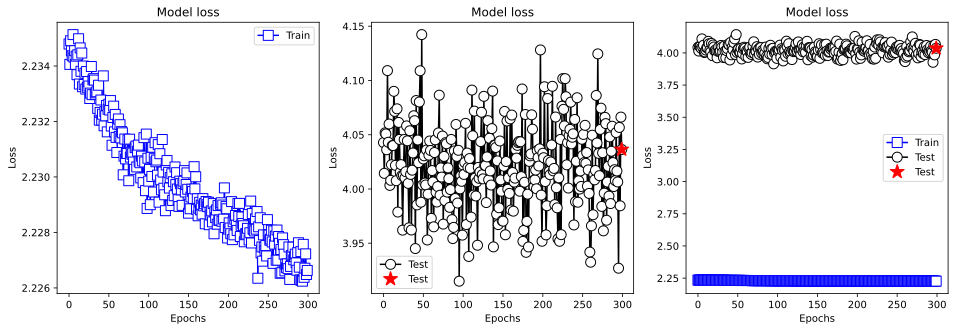

In [234]:
fig,ax = plt.subplots(1, 3, figsize=(16, 5))

# ax[0].plot(smooth(trainLoss))
# ax[0].plot(smooth(testLoss))
ax[0].plot(trainLoss, 'sb-', markerfacecolor='w', markersize=10, label='Train')

ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Model loss')
ax[0].legend()



ax[1].plot(testLoss, 'ko-', markerfacecolor='w', markersize=10, label='Test')
ax[1].plot(len(testLoss) - 1, testLoss[-1], 'r*', markersize=15, label='Test')

ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_title('Model loss')
# ax[1].set_ylim([0, 0.5])
ax[1].legend()



ax[2].plot(trainLoss, 'sb-', markerfacecolor='w', markersize=10, label='Train')
ax[2].plot(testLoss, 'ko-', markerfacecolor='w', markersize=10, label='Test')
ax[2].plot(len(testLoss) - 1, testLoss[-1], 'r*', markersize=15, label='Test')

ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Loss')
ax[2].set_title('Model loss')
ax[2].legend()




# plt.ylim([0,1])
# plt.xlim([-10,10]) # note: this actually clips two data points


plt.savefig("loss2.jpg", bbox_inches='tight')


plt.show()

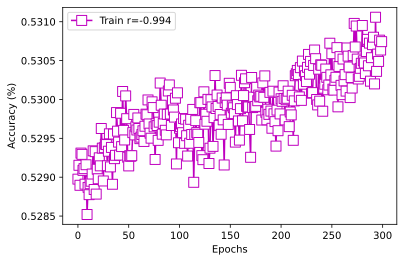

In [235]:
plt.plot(trainAcc, 'ms-', markerfacecolor='w', markersize=10, label='Train')

plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')

# correlations between predictions and outputs
corrTrain = np.corrcoef(yHat.detach().T, y.T) [1,0]

plt.legend([ f'Train r={corrTrain:0.3f}'])


plt.savefig("acc2.jpg", bbox_inches='tight')


plt.show()

In [236]:
['day_scaled', 'day_sin', 'day_cos', 'month_scaled', 'month_sin', 'month_cos', 
             'leap_year', 'decade_scaled', 'decade_sin', 'decade_cos']

['day_scaled',
 'day_sin',
 'day_cos',
 'month_scaled',
 'month_sin',
 'month_cos',
 'leap_year',
 'decade_scaled',
 'decade_sin',
 'decade_cos']

In [237]:
def result_to_date(result):
    
    result = str(result)
    
    day   = int(result[6:]) - 1
    month = int(result[4:6]) - 1

    ss = str(f'{result[:4]}0101')
    
    ds = datetime.datetime.strptime(ss, '%Y%m%d')
    
    ds = ds + relativedelta(months=month, days=day)

    result = ds.strftime('%d-%m-%Y')
    
    
    return result

In [238]:
# (16830739, 17848869)
result_to_date(16830739), result_to_date(17848869)

('08-08-1683', '08-06-1791')

In [239]:
def test_model(input_list):
    

    X       = np.zeros((1, 10))
    X_smote = np.zeros((1, 10))



    day       = np.array(map_day[input_list[0]])
    month     = np.array(map_month[input_list[1]])
    leap_year = map_leap_year[input_list[2]]
    decade    = np.array(input_list[3].strip('[]')).astype('int64')


    X[0, 0] = scaler_day.transform(day.reshape(-1, 1)).flatten()
    X[0, 1] = np.sin(day * (2 * np.pi / 7))
    X[0, 2] = np.cos(day * (2 * np.pi / 7))

    X[0, 3] = scaler_month.transform(month.reshape(-1, 1)).flatten()
    X[0, 4] = np.sin(month * (2 * np.pi / 12))
    X[0, 5] = np.cos(month * (2 * np.pi / 12))

    X[0, 6] = leap_year

    X[0, 7] = scaler_decade.transform(decade.reshape(-1, 1)).flatten()
    X[0, 8] = np.sin(decade * (2 * np.pi / alpha))
    X[0, 9] = np.cos(decade * (2 * np.pi / alpha))

    # ---

    X_smote[0, 0] = scaler_day_smote.transform(day.reshape(-1, 1)).flatten()
    X_smote[0, 1] = X[0, 1]
    X_smote[0, 2] = X[0, 2]

    X_smote[0, 3] = scaler_month_smote.transform(month.reshape(-1, 1)).flatten()
    X_smote[0, 4] = X[0, 4]
    X_smote[0, 5] = X[0, 5]

    X_smote[0, 6] = leap_year

    X_smote[0, 7] = scaler_decade_smote.transform(decade.reshape(-1, 1)).flatten()
    X_smote[0, 8] = np.sin(decade * (2 * np.pi / alpha_smote))
    X_smote[0, 9] = np.cos(decade * (2 * np.pi / alpha_smote))


    # ---

    result       = model(torch.tensor(X).to(device).float())
    result_smote = model_smote(torch.tensor(X_smote).to(device).float())


    # ---


    result       = ''.join(result.detach().cpu().numpy().round().astype(int).astype(str).flatten())
    result_smote = ''.join(result_smote.detach().cpu().numpy().round().astype(int).astype(str).flatten())


    
    return result_to_date(result), result_to_date(result_smote)





In [240]:
input_test1 = ['[MON]', '[DEC]', '[False]', '[196]']
output_test1 = '3-12-1962'

input_test2 = ['[THU]', '[DEC]', '[True]', '[204]']
output_test2 = '3-12-2048'

input_test3 = ['[WED]', '[JAN]', '[False]', '[181]']
output_test3 = '10-1-1810'


input_test4 = ['[WED]', '[JUN]', '[False]', '[209]']



In [241]:
test_model(input_test1), test_model(input_test2), test_model(input_test3), test_model(input_test4)

(('14-12-1964', '15-02-1964'),
 ('15-12-2045', '15-12-2044'),
 ('15-11-1815', '15-11-1814'),
 ('15-06-2084', '15-06-2094'))

In [242]:
output_test1, output_test2, output_test3

('3-12-1962', '3-12-2048', '10-1-1810')

In [243]:
# example_input = pd.read_csv('./data/example_input.txt', sep=' ', header=None)
example_input = pd.read_csv('example_input.txt', sep=' ', header=None)


example_input.columns = ['day', 'month', 'leap_year', 'decade']


In [244]:
example_input

day  month leap_year decade
0     [WED]  [JAN]   [False]  [180]
1     [MON]  [JAN]   [False]  [190]
2     [SAT]  [JAN]    [True]  [200]
3     [FRI]  [JAN]   [False]  [210]
4     [WED]  [JAN]   [False]  [220]
...     ...    ...       ...    ...
1460  [MON]  [OCT]    [True]  [214]
1461  [TUE]  [DEC]   [False]  [183]
1462  [SUN]  [DEC]   [False]  [193]
1463  [SAT]  [DEC]   [False]  [203]
1464  [THU]  [DEC]   [False]  [213]

[1465 rows x 4 columns]

In [245]:
R       = pd.DataFrame(np.nan, index=np.arange(len(example_input)), columns=['result'])
R_smote = pd.DataFrame(np.nan, index=np.arange(len(example_input)), columns=['result_smote'])

In [246]:
example_input.iloc[0].tolist()

['[WED]', '[JAN]', '[False]', '[180]']

In [247]:
for i in range(len(example_input)):
    R.iloc[i], R_smote.iloc[i] = test_model(example_input.iloc[i].tolist())

In [248]:
R

result
0     15-12-1804
1     15-11-1904
2     15-11-2005
3     15-12-2105
4     15-02-2200
...          ...
1460  15-10-2145
1461  14-12-1835
1462  14-12-1935
1463  15-12-2035
1464  15-12-2135

[1465 rows x 1 columns]

In [249]:
final = pd.concat([example_input, R], axis=1)
final

day  month leap_year decade      result
0     [WED]  [JAN]   [False]  [180]  15-12-1804
1     [MON]  [JAN]   [False]  [190]  15-11-1904
2     [SAT]  [JAN]    [True]  [200]  15-11-2005
3     [FRI]  [JAN]   [False]  [210]  15-12-2105
4     [WED]  [JAN]   [False]  [220]  15-02-2200
...     ...    ...       ...    ...         ...
1460  [MON]  [OCT]    [True]  [214]  15-10-2145
1461  [TUE]  [DEC]   [False]  [183]  14-12-1835
1462  [SUN]  [DEC]   [False]  [193]  14-12-1935
1463  [SAT]  [DEC]   [False]  [203]  15-12-2035
1464  [THU]  [DEC]   [False]  [213]  15-12-2135

[1465 rows x 5 columns]

In [250]:
final_smote = pd.concat([example_input, R_smote], axis=1)
final_smote

day  month leap_year decade result_smote
0     [WED]  [JAN]   [False]  [180]   15-11-1805
1     [MON]  [JAN]   [False]  [190]   15-11-1905
2     [SAT]  [JAN]    [True]  [200]   15-11-2005
3     [FRI]  [JAN]   [False]  [210]   15-11-2205
4     [WED]  [JAN]   [False]  [220]   15-11-2294
...     ...    ...       ...    ...          ...
1460  [MON]  [OCT]    [True]  [214]   15-10-2244
1461  [TUE]  [DEC]   [False]  [183]   15-02-1834
1462  [SUN]  [DEC]   [False]  [193]   15-02-1934
1463  [SAT]  [DEC]   [False]  [203]   15-12-2034
1464  [THU]  [DEC]   [False]  [213]   15-12-2234

[1465 rows x 5 columns]

In [251]:
final.to_csv('output_file.txt', sep=' ', header=None, index=False)

In [252]:
final_smote.to_csv('output_file_smote.txt', sep=' ', header=None, index=False)

Out-liers

Saving

In [253]:
checkpoint = {'model_state_dict'      : model.state_dict(),
              'model_smote_state_dict': model_smote.state_dict(),

              'scaler_day' : scaler_day,
              'scaler_month' : scaler_month,
              'scaler_decade' : scaler_decade,

              'scaler_day_smote' : scaler_day_smote,
              'scaler_month_smote' : scaler_month_smote,
              'scaler_decade_smote' : scaler_decade_smote,
              
              'alpha': alpha,
              'alpha_smote': alpha_smote}



torch.save(checkpoint, 'checkpoint.pth.tar')


In [254]:
# checkpoint = torch.load('checkpoint.pth.tar')

In [255]:

# model       = Model()
# model_smote = Model()


# model.load_state_dict(checkpoint['model_state_dict'])
# model_smote.load_state_dict(checkpoint['model_smote_state_dict'])

